In [1]:
from rdkit import Chem
from rdkit.Chem import rdChemReactions
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

In [2]:
intra_rxn = AllChem.ReactionFromSmarts('([C:1][C:2](=[O:6])[O:3].[N:4][C:5])>>[C:1][C:2](=[O:6])[N:4][C:5]')
inter_rxn = AllChem.ReactionFromSmarts('[C:1][C:2](=[O:6])[O:3].[N:4][C:5]>>[C:1][C:2](=[O:6])[N:4][C:5]')

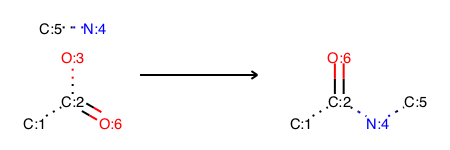

In [3]:
intra_rxn

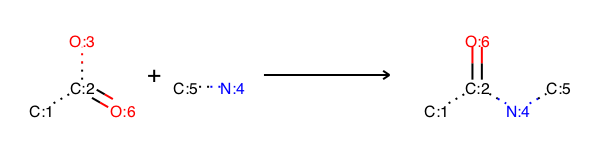

In [4]:
inter_rxn

In [5]:
acid = Chem.MolFromSmiles('CC(=O)O')
amine = Chem.MolFromSmiles('NC')
aminoacid =  Chem.MolFromSmiles('N(C)CCC(O)CC(=O)O')
combmol = Chem.MolFromSmiles("CC(=O)O.N1CCC(C)1")

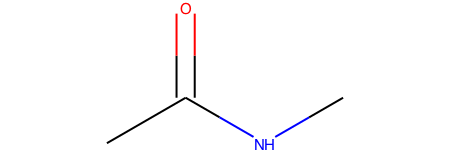

In [9]:
inter_rxn.RunReactants([acid, amine])[0][0]

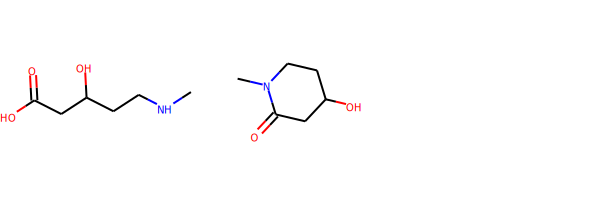

In [218]:
Draw.MolsToGridImage([ aminoacid, ps2[0][0]])

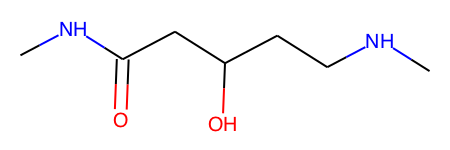

In [20]:
# Intra reaction can not represent with inter molecular reactoin query
inter_rxn.RunReactant(aminoacid,0)[0][0]

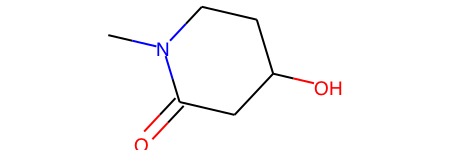

In [23]:
#inra moleclar query works fine
intra_rxn.RunReactant(aminoacid,0)[0][0]

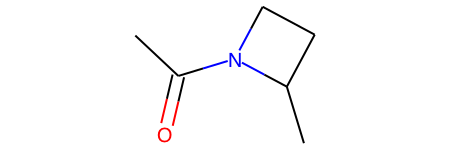

In [24]:
# paired molecular object also works but get two molecules as one object
intra_rxn.RunReactant(combmol,0)[0][0]

In [28]:
def sepMol(mol):
    smi_list = Chem.MolToSmiles(mol).split('.')
    mols = [ Chem.MolFromSmiles(smi) for smi in smi_list]
    return mols

In [29]:
ms = sepMol(combmol)
print(len(ms))
ms.append(intra_rxn.RunReactant(combmol,0)[0][0])

2


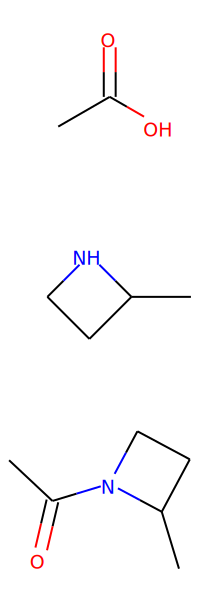

In [30]:
Draw.MolsToGridImage(ms, molsPerRow=1)